In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/2upf-qytp.csv')
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01T00:46:40.000,2019-01-01T00:53:20.000,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01T00:59:47.000,2019-01-01T01:18:59.000,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21T13:48:30.000,2018-12-21T13:52:40.000,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28T15:52:25.000,2018-11-28T15:55:45.000,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28T15:56:57.000,2018-11-28T15:58:33.000,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [167]:
print(df['payment_type'].unique())

[1 2 4 3]


In [168]:
# prompt: check blank spaces in df

# Check for blank spaces (which appear as NaN in pandas)
print("\nChecking for blank spaces (NaN values) in the DataFrame:")
print(df.isnull().sum())


Checking for blank spaces (NaN values) in the DataFrame:
vendorid                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
ratecodeid                  0
store_and_fwd_flag          0
pulocationid                0
dolocationid                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1000
dtype: int64


In [169]:
df.isnull()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [170]:
df['congestion_surcharge'].isnull().sum()

np.int64(1000)

In [171]:
df.shape

(1000, 18)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               1000 non-null   int64  
 1   tpep_pickup_datetime   1000 non-null   object 
 2   tpep_dropoff_datetime  1000 non-null   object 
 3   passenger_count        1000 non-null   int64  
 4   trip_distance          1000 non-null   float64
 5   ratecodeid             1000 non-null   int64  
 6   store_and_fwd_flag     1000 non-null   object 
 7   pulocationid           1000 non-null   int64  
 8   dolocationid           1000 non-null   int64  
 9   payment_type           1000 non-null   int64  
 10  fare_amount            1000 non-null   float64
 11  extra                  1000 non-null   float64
 12  mta_tax                1000 non-null   float64
 13  tip_amount             1000 non-null   float64
 14  tolls_amount           1000 non-null   float64
 15  impro

In [173]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.dtypes

,0
vendorid,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,int64
trip_distance,float64
ratecodeid,int64
store_and_fwd_flag,object
pulocationid,int64
dolocationid,int64
payment_type,int64


In [174]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4.166667
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,3.333333
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,1.600000


In [175]:
rdf = df[['passenger_count','trip_distance','payment_type','fare_amount',"duration"]]
rdf.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.5,1,7.0,6.666667
1,1,2.6,1,14.0,19.200000
2,3,0.0,1,4.5,4.166667
3,5,0.0,2,3.5,3.333333
4,5,0.0,2,52.0,1.600000


In [176]:
rdf.isnull().sum()

,0
passenger_count,0
trip_distance,0
payment_type,0
fare_amount,0
duration,0


In [177]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  1000 non-null   int64  
 1   trip_distance    1000 non-null   float64
 2   payment_type     1000 non-null   int64  
 3   fare_amount      1000 non-null   float64
 4   duration         1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [178]:
rdf[rdf.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
698,1,0.9,1,5.0,4.116667
908,1,1.0,2,6.0,5.300000


In [179]:
rdf['passenger_count'].value_counts()

,count
passenger_count,
1,608
2,235
3,62
4,45
5,35
6,10
0,5


In [180]:
rdf['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.608
2,0.235
3,0.062
4,0.045
5,0.035
6,0.010
0,0.005


In [181]:
rdf['payment_type'].value_counts()

,count
payment_type,
1,627
2,363
3,9
4,1


In [182]:
rdf = rdf[rdf['payment_type']<3]
rdf =  rdf[(rdf['passenger_count']>0) & (rdf['passenger_count']<6)]

In [183]:
rdf.shape

(976, 5)

In [184]:
rdf['payment_type'].replace({1:'Credit Card',2:'Cash'},inplace=True)

In [185]:
rdf.describe()

,passenger_count,trip_distance,fare_amount,duration
count,976.000000,976.000000,976.000000,976.000000
mean,1.642418,2.863422,12.475922,18.057616
std,1.027920,3.203922,9.369464,78.670386
min,1.000000,0.000000,2.500000,0.000000
25%,1.000000,1.010000,6.500000,6.562500
50%,1.000000,1.860000,9.500000,11.350000
75%,2.000000,3.505000,15.500000,18.716667
max,5.000000,31.570000,82.500000,1438.150000


In [186]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  976 non-null    int64  
 1   trip_distance    976 non-null    float64
 2   payment_type     976 non-null    object 
 3   fare_amount      976 non-null    float64
 4   duration         976 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 45.8+ KB


In [187]:
rdf = rdf[rdf['duration']>0]
rdf = rdf[rdf['trip_distance']>0]
rdf = rdf[rdf['fare_amount']>0]

In [188]:
rdf.describe()

,passenger_count,trip_distance,fare_amount,duration
count,968.000000,968.000000,968.000000,968.000000
mean,1.626033,2.887087,12.447831,18.190358
std,1.007020,3.206501,9.209029,78.981365
min,1.000000,0.060000,2.500000,0.316667
25%,1.000000,1.050000,6.500000,6.666667
50%,1.000000,1.895000,9.500000,11.433333
75%,2.000000,3.562500,15.500000,18.737500
max,5.000000,31.570000,82.500000,1438.150000


In [189]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  968 non-null    int64  
 1   trip_distance    968 non-null    float64
 2   payment_type     968 non-null    object 
 3   fare_amount      968 non-null    float64
 4   duration         968 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 45.4+ KB


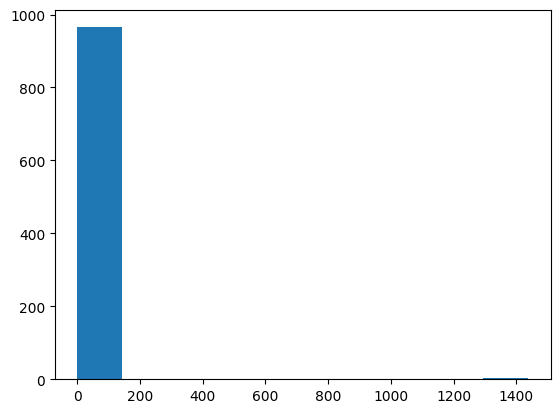

In [190]:
plt.hist(rdf['duration'])
plt.show()

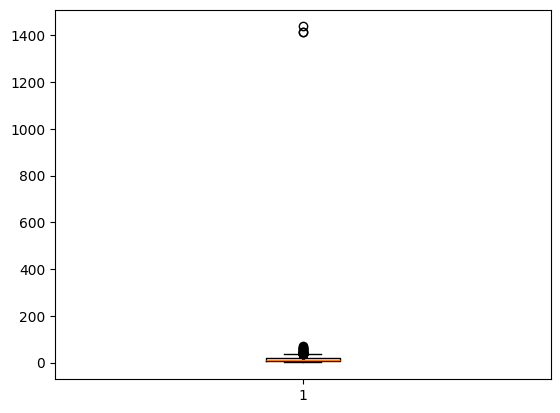

In [191]:
plt.boxplot(rdf['duration'])
plt.show()

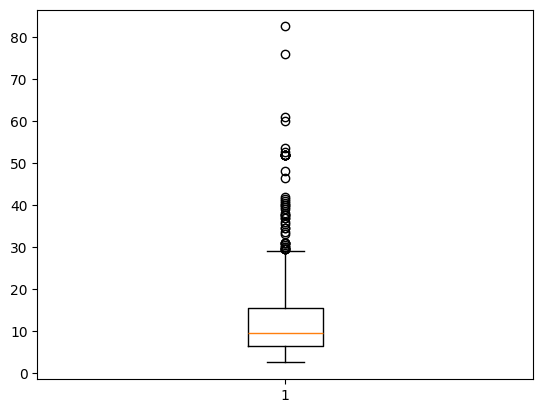

In [192]:
plt.boxplot(rdf['fare_amount'])
plt.show()

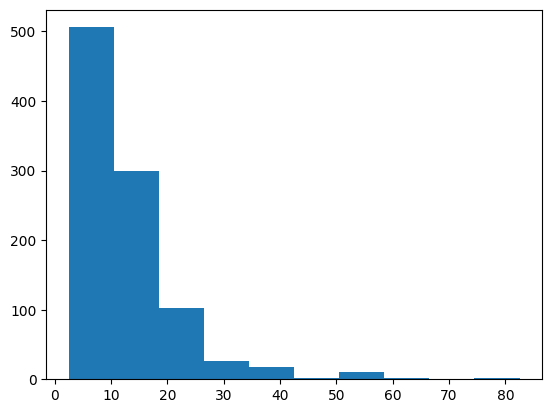

In [193]:
plt.hist(rdf['fare_amount'])
plt.show()

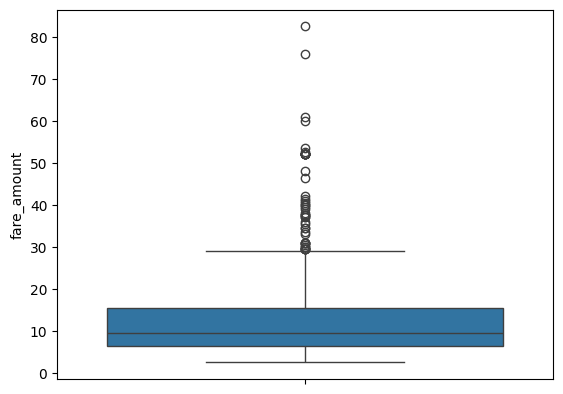

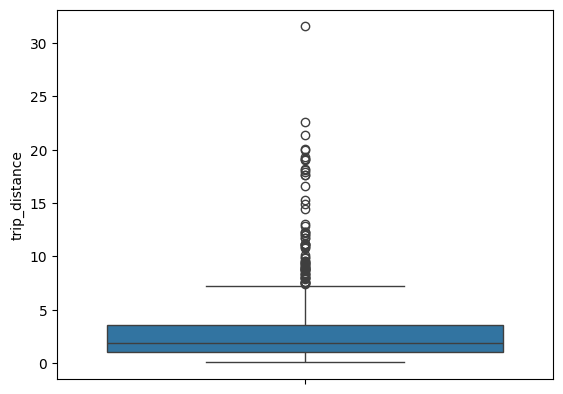

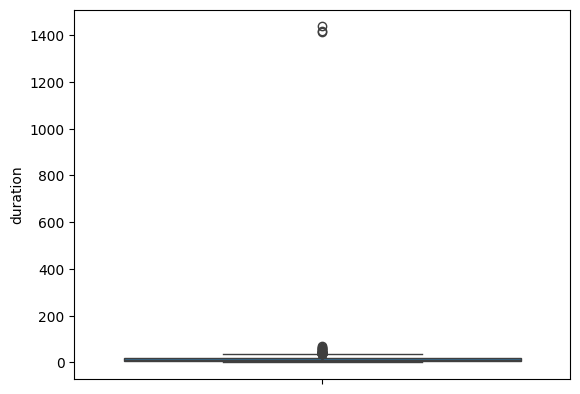

In [194]:
for col in ['fare_amount','trip_distance','duration']:
  sns.boxplot(rdf[col])
  plt.show()

In [195]:
for col in ['fare_amount','trip_distance','duration']:
  q1=rdf[col].quantile(0.25)
  q3=rdf[col].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  rdf=rdf[(rdf[col]>lower_bound) & (rdf[col]<upper_bound)]

In [196]:
rdf.shape

(864, 5)

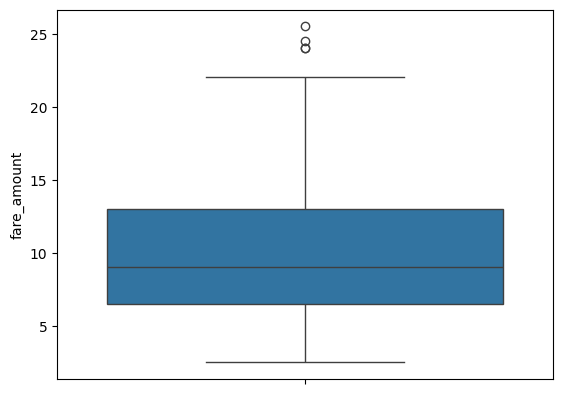

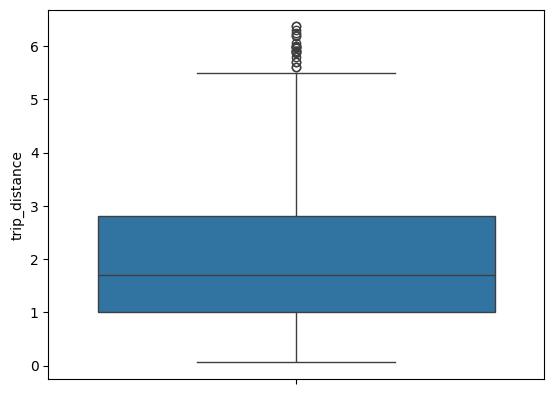

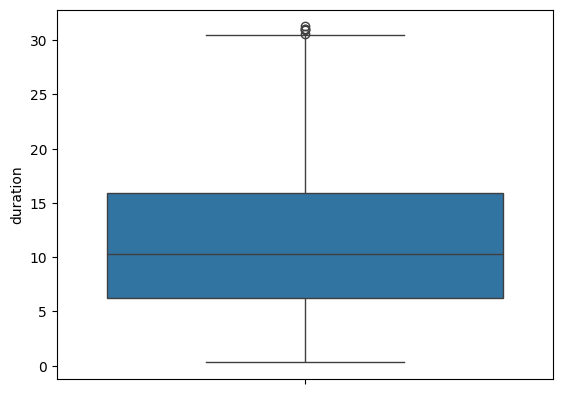

In [197]:
for col in ['fare_amount','trip_distance','duration']:
  sns.boxplot(rdf[col])
  plt.show()

In [198]:
rdf.describe()

,passenger_count,trip_distance,fare_amount,duration
count,864.000000,864.000000,864.000000,864.000000
mean,1.614583,2.061701,10.004051,11.620390
std,0.996318,1.395261,4.640398,6.826470
min,1.000000,0.060000,2.500000,0.316667
25%,1.000000,0.997500,6.500000,6.229167
50%,1.000000,1.700000,9.000000,10.291667
75%,2.000000,2.800000,13.000000,15.933333
max,5.000000,6.370000,25.500000,31.266667


Text(0, 0.5, 'Frequency')

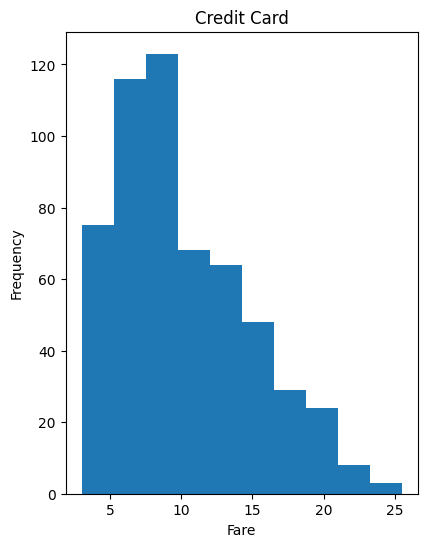

In [199]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(rdf[rdf['payment_type']=='Credit Card']['fare_amount'])
plt.title('Credit Card')
plt.xlabel('Fare')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

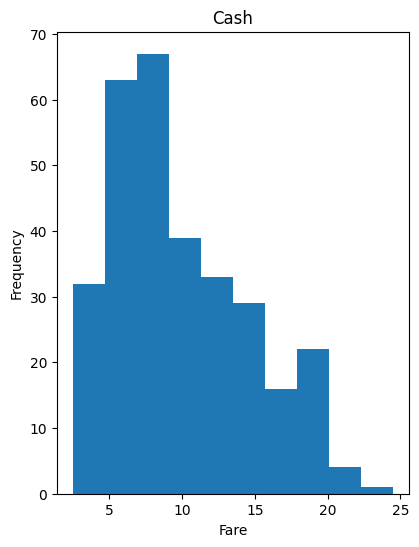

In [200]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(rdf[rdf['payment_type']=='Cash']['fare_amount'])
plt.title('Cash')
plt.xlabel('Fare')
plt.ylabel('Frequency')

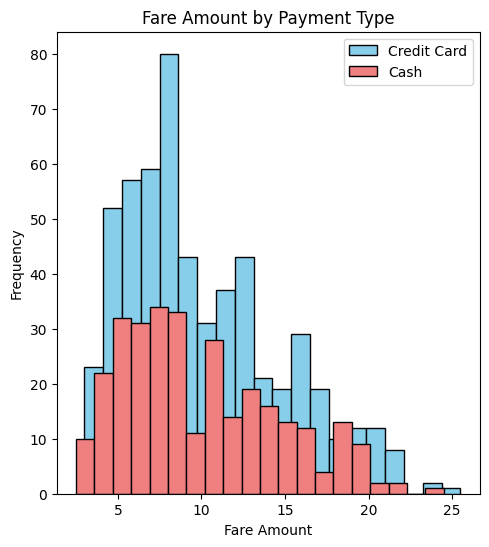

In [201]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist([rdf[rdf['payment_type']=='Credit Card']['fare_amount']], histtype='barstacked', color='skyblue',bins = 20, edgecolor = "black")
plt.hist([rdf[rdf['payment_type']=='Cash']['fare_amount']], histtype='barstacked', color='lightcoral',bins = 20, edgecolor = "black")
plt.title('Fare Amount by Payment Type')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend(['Credit Card','Cash'])
plt.show()

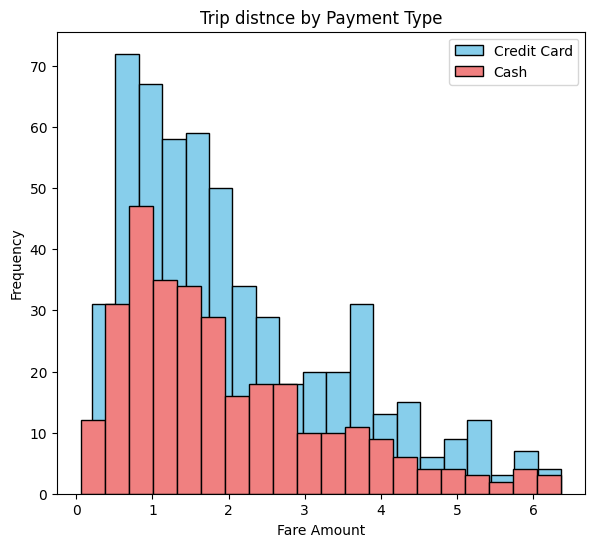

In [202]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist([rdf[rdf['payment_type']=='Credit Card']['trip_distance']], histtype='barstacked', color='skyblue',bins = 20, edgecolor = "black")
plt.hist([rdf[rdf['payment_type']=='Cash']['trip_distance']], histtype='barstacked', color='lightcoral',bins = 20, edgecolor = "black")
plt.title('Trip distnce by Payment Type')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend(['Credit Card','Cash'])
plt.show()

In [203]:
rdf.groupby('payment_type').agg({'trip_distance':['mean','std'],'fare_amount':['mean','std']})

trip_distance           fare_amount          
                      mean       std        mean       std
payment_type                                              
Cash              1.973595  1.381434    9.900327  4.656464
Credit Card       2.110018  1.401667   10.060932  4.634762

([<matplotlib.patches.Wedge at 0x7d7fec604990>,
 [Text(-0.48651751203638877, 0.9865600389646454, 'Credit Card'),
  Text(0.48651759828420815, -0.9865599964319282, 'Cash')],
 [Text(-0.2653731883834847, 0.5381236576170793, '64.6%'),
  Text(0.2653732354277499, -0.5381236344174153, '35.4%')])

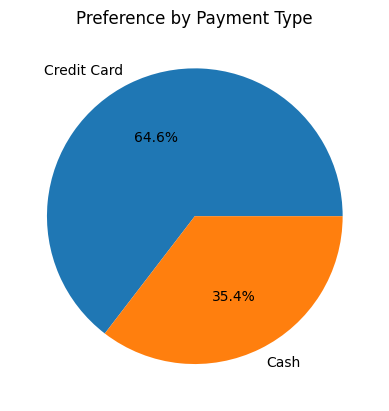

In [204]:
plt.title("Preference by Payment Type")
plt.pie(rdf['payment_type'].value_counts(normalize=True),labels=rdf['payment_type'].value_counts().index,autopct='%1.1f%%')

In [205]:
rdf.groupby(['payment_type','passenger_count']).size()

payment_type  passenger_count
Cash          1                  192
              2                   66
              3                   24
              4                   17
              5                    7
Credit Card   1                  349
              2                  141
              3                   26
              4                   23
              5                   19
dtype: int64

In [206]:
passenger_count = rdf.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

In [207]:
passenger_count

passenger_count
payment_type passenger_count                 
Cash         1                            192
             2                             66
             3                             24
             4                             17
             5                              7
Credit Card  1                            349
             2                            141
             3                             26
             4                             23
             5                             19

In [208]:
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [209]:
passenger_count

,payment_type,passenger_count,count
0,Cash,1,192
1,Cash,2,66
2,Cash,3,24
3,Cash,4,17
4,Cash,5,7
5,Credit Card,1,349
6,Credit Card,2,141
7,Credit Card,3,26
8,Credit Card,4,23
9,Credit Card,5,19


In [210]:
passenger_count['perc'] = (passenger_count['count']/ passenger_count['count'].sum())*100

In [211]:
passenger_count

,payment_type,passenger_count,count,perc
0,Cash,1,192,22.222222
1,Cash,2,66,7.638889
2,Cash,3,24,2.777778
3,Cash,4,17,1.967593
4,Cash,5,7,0.810185
5,Credit Card,1,349,40.393519
6,Credit Card,2,141,16.319444
7,Credit Card,3,26,3.009259
8,Credit Card,4,23,2.662037
9,Credit Card,5,19,2.199074


In [212]:
# prompt: creata a new a dataframe tanseverse the df based on card and cash
#  the passenger count data frame

df_transverse = passenger_count.pivot_table(index='passenger_count', columns='payment_type', values='count').reset_index()
df_transverse.columns.name = None # remove the index name
df_transverse.rename(columns={'Credit Card': 'Credit_Card_Count', 'Cash': 'Cash_Count'}, inplace=True)

# Add percentage columns
df_transverse['Credit_Card_Perc'] = (df_transverse['Credit_Card_Count'] / df_transverse['Credit_Card_Count'].sum()) * 100
df_transverse['Cash_Perc'] = (df_transverse['Cash_Count'] / df_transverse['Cash_Count'].sum()) * 100

df_transverse

,passenger_count,Cash_Count,Credit_Card_Count,Credit_Card_Perc,Cash_Perc
0,1,192.0,349.0,62.544803,62.745098
1,2,66.0,141.0,25.268817,21.568627
2,3,24.0,26.0,4.659498,7.843137
3,4,17.0,23.0,4.121864,5.555556
4,5,7.0,19.0,3.405018,2.287582


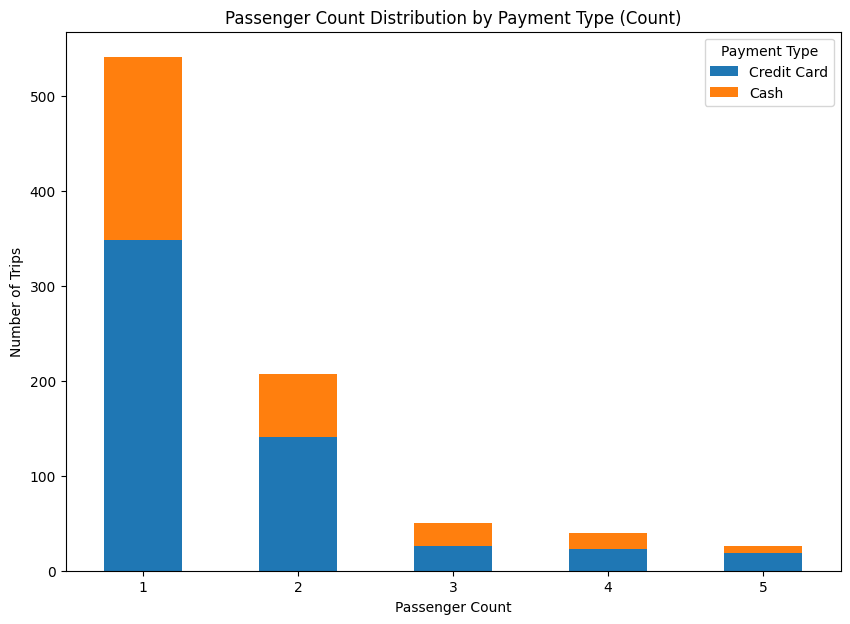

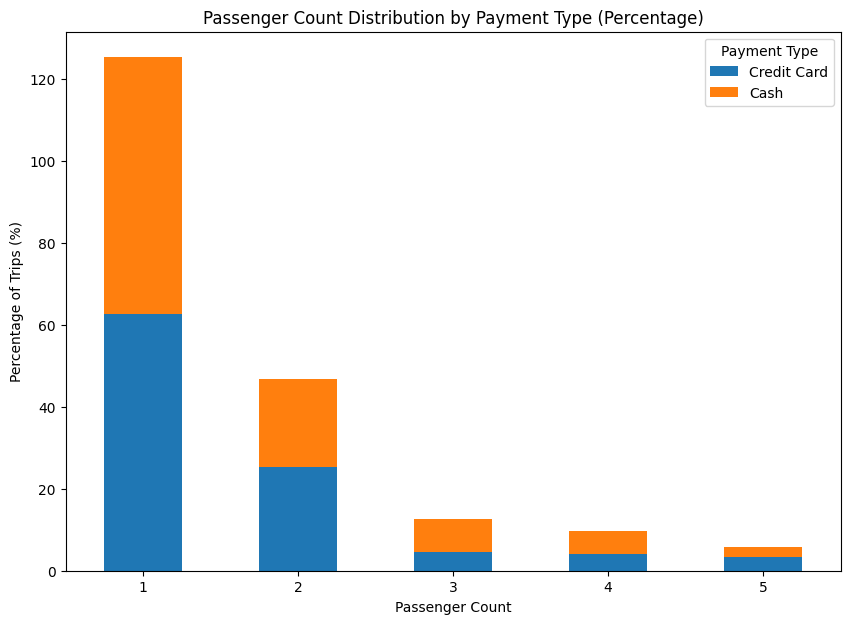

In [213]:
# prompt: make a stack bar chart using passenger_count data based payment_type

# Make a stacked bar chart using passenger_count data based on payment_type

# Plot stacked bar chart of counts
df_transverse.plot(x='passenger_count', y=['Credit_Card_Count', 'Cash_Count'], kind='bar', stacked=True, figsize=(10, 7))
plt.title('Passenger Count Distribution by Payment Type (Count)')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(['Credit Card', 'Cash'], title='Payment Type')
plt.show()

# Plot stacked bar chart of percentages
df_transverse.plot(x='passenger_count', y=['Credit_Card_Perc', 'Cash_Perc'], kind='bar', stacked=True, figsize=(10, 7))
plt.title('Passenger Count Distribution by Payment Type (Percentage)')
plt.xlabel('Passenger Count')
plt.ylabel('Percentage of Trips (%)')
plt.xticks(rotation=0)
plt.legend(['Credit Card', 'Cash'], title='Payment Type')
plt.show()

In [214]:
ndf = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
ndf['payment_type'] = ['Cash','Card']
ndf.iloc[0,1:] = passenger_count.iloc[0:5,-1]
ndf.iloc[1,1:] = passenger_count.iloc[5:, -1]
ndf

,payment_type,1,2,3,4,5
0,Cash,22.222222,7.638889,2.777778,1.967593,0.810185
1,Card,40.393519,16.319444,3.009259,2.662037,2.199074


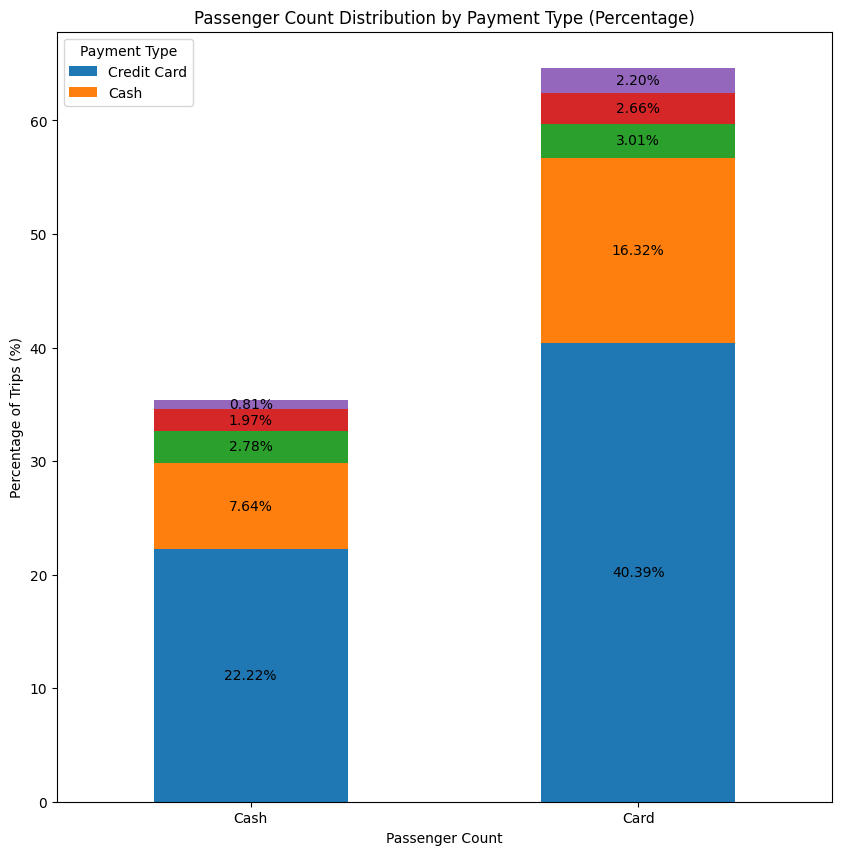

In [215]:
ax=ndf.plot(x='payment_type', kind='bar', stacked=True, figsize=(10, 10))
plt.title('Passenger Count Distribution by Payment Type (Percentage)')
plt.xlabel('Passenger Count')
plt.ylabel('Percentage of Trips (%)')
plt.xticks(rotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.2f}%'.format(height), ha='center', va='center')
plt.legend(['Credit Card', 'Cash'], title='Payment Type')
plt.show()

In [216]:
# prompt: Null hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash.
# Alternative hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash

# Null Hypothesis (H0): There is no difference in average fare between customers who use credit cards and customers who use cash.
# Alternative Hypothesis (H1): There is a difference in average fare between customers who use credit cards and customers who use cash.

# We have already performed the t-test on the cleaned data (`rdf`) and the results are stored in `ttest_result_cleaned`.
# The p-value from this test tells us whether to reject or fail to reject the null hypothesis.

print("\n--- Summary of Hypothesis Test Results ---")
print("Null Hypothesis (H0): There is no difference in average fare between customers who use credit cards and customers who use cash.")
print("Alternative Hypothesis (H1): There is a difference in average fare between customers who use credit cards and customers who use cash.")
print(f"T-statistic: {ttest_result_cleaned.statistic:.4f}")
print(f"P-value: {ttest_result_cleaned.pvalue:.4f}")
print(f"Significance level (alpha): {alpha}")

if ttest_result_cleaned.pvalue < alpha:
  print("Decision: Reject the Null Hypothesis.")
  print("Conclusion: There is statistically significant evidence to suggest a difference in the average fare between customers who use credit cards and customers who use cash.")
else:
  print("Decision: Fail to Reject the Null Hypothesis.")
  print("Conclusion: There is not enough statistically significant evidence to suggest a difference in the average fare between customers who use credit cards and customers who use cash.")

# To further understand the difference if the null hypothesis was rejected,
# we look at the sample means:
mean_fare_credit_card_cleaned = rdf[rdf['payment_type'] == 'Credit Card']['fare_amount'].mean()
mean_fare_cash_cleaned = rdf[rdf['payment_type'] == 'Cash']['fare_amount'].mean()

print(f"\nMean fare for Credit Card payments (cleaned data): ${mean_fare_credit_card_cleaned:.2f}")
print(f"Mean fare for Cash payments (cleaned data): ${mean_fare_cash_cleaned:.2f}")

if ttest_result_cleaned.pvalue < alpha:
    if mean_fare_credit_card_cleaned > mean_fare_cash_cleaned:
        print("\nInterpretation: The average fare for Credit Card payments is statistically significantly higher than for Cash payments.")
    else:
        print("\nInterpretation: The average fare for Cash payments is statistically significantly higher than for Credit Card payments.")
else:
    print("\nInterpretation: The observed difference in sample means is not statistically significant at the {alpha} level.")


--- Summary of Hypothesis Test Results ---
Null Hypothesis (H0): There is no difference in average fare between customers who use credit cards and customers who use cash.
Alternative Hypothesis (H1): There is a difference in average fare between customers who use credit cards and customers who use cash.
T-statistic: 0.4857
P-value: 0.6274
Significance level (alpha): 0.05
Decision: Fail to Reject the Null Hypothesis.
Conclusion: There is not enough statistically significant evidence to suggest a difference in the average fare between customers who use credit cards and customers who use cash.

Mean fare for Credit Card payments (cleaned data): $10.06
Mean fare for Cash payments (cleaned data): $9.90

Interpretation: The observed difference in sample means is not statistically significant at the {alpha} level.


In [217]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

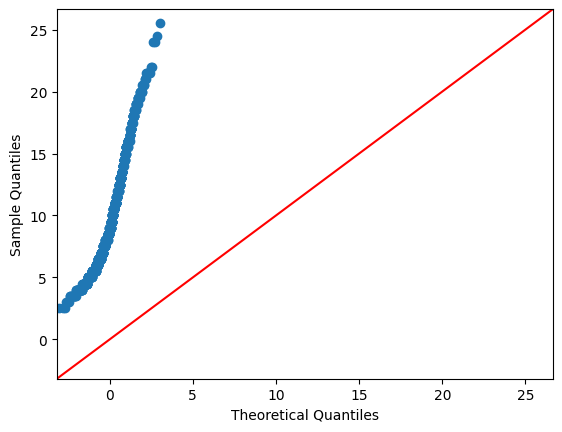

In [218]:
sm.qqplot(rdf['fare_amount'],line='45')
plt.show()

In [219]:
Card_Sample = rdf[rdf['payment_type'] == 'Credit Card']['fare_amount']
Cash_Sample = rdf[rdf['payment_type'] == 'Cash']['fare_amount']

In [220]:
t_stats, p_value = st.ttest_ind(a=Card_Sample,b=Cash_Sample,equal_var = False)
print(f"T-statistic: {t_stats:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.4857
P-value: 0.6274


In [221]:
# prompt: perform a regression analysis on rdf dataframe

# Convert the categorical payment_type into numerical for regression
rdf['payment_type_numeric'] = rdf['payment_type'].apply(lambda x: 1 if x == 'Credit Card' else 0) # 1 for Credit Card, 0 for Cash

# Define the dependent variable (y) and independent variables (X)
y = rdf['fare_amount']
X = rdf[['passenger_count', 'trip_distance', 'duration', 'payment_type_numeric']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Optional: You can also perform regression separately for each payment type if needed
# Regression for Credit Card payments
# y_card = rdf[rdf['payment_type'] == 'Credit Card']['fare_amount']
# X_card = rdf[rdf['payment_type'] == 'Credit Card'][['passenger_count', 'trip_distance', 'duration']]
# X_card = sm.add_constant(X_card)
# model_card = sm.OLS(y_card, X_card).fit()
# print("\nRegression Summary for Credit Card Payments:")
# print(model_card.summary())

# Regression for Cash payments
# y_cash = rdf[rdf['payment_type'] == 'Cash']['fare_amount']
# X_cash = rdf[rdf['payment_type'] == 'Cash'][['passenger_count', 'trip_distance', 'duration']]
# X_cash = sm.add_constant(X_cash)
# model_cash = sm.OLS(y_cash, X_cash).fit()
# print("\nRegression Summary for Cash Payments:")
# print(model_cash.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.422e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:50:19   Log-Likelihood:                -506.32
No. Observations:                 864   AIC:                             1023.
Df Residuals:                     859   BIC:                             1046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1374 